In [1]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd


In [2]:

auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

worksheet = gc.open('Dataset').sheet1

rows = worksheet.get_all_values()

df = pd.DataFrame(rows[1:], columns=rows[0])

df.head()


,X,Y
0,15,25
1,25,35
2,35,45
3,45,55
4,55,65


In [3]:
df.dtypes

X    object
Y    object
dtype: object

In [4]:
df=df.astype({'X':'float'})
df=df.astype({'Y':'float'})

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X=df[['X']].values

In [7]:
Y=df[['Y']].values

In [8]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=50)

In [9]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

In [10]:
x_test

array([[55.],
       [75.],
       [85.]])

In [11]:
Y

array([[ 25.],
       [ 35.],
       [ 45.],
       [ 55.],
       [ 65.],
       [ 75.],
       [ 85.],
       [ 95.],
       [105.]])

In [12]:
scalar= MinMaxScaler()

In [13]:
scalar.fit(x_train)

MinMaxScaler()

In [14]:
x_train_scaled= scalar.transform(x_train)

In [15]:
x_train_scaled

array([[0.25 ],
       [0.125],
       [0.625],
       [0.375],
       [1.   ],
       [0.   ]])

In [16]:
ai_brain=Sequential([Dense(4,activation='relu'),Dense(3,activation='relu'),Dense(2,activation='relu'),Dense(1,activation='relu')])

In [17]:
ai_brain.compile(optimizer="rmsprop",loss='mse')

In [ ]:
ai_brain.fit(x=x_train_scaled,y=y_train,epochs=20000)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 12ms/step - loss: 0.0029
Epoch 17501/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0029
Epoch 17502/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0029
Epoch 17503/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0029
Epoch 17504/20000
1/1 [==============================] - 0s 16ms/step - loss: 0.0029
Epoch 17505/20000
1/1 [==============================] - 0s 18ms/step - loss: 0.0029
Epoch 17506/20000
1/1 [==============================] - 0s 17ms/step - loss: 0.0029
Epoch 17507/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0029
Epoch 17508/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0029
Epoch 17509/20000
1/1 [==============================] - 0s 12ms/step - loss: 0.0029
Epoch 17510/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0029
Epoch 17511/20000
1/1 [===========

In [ ]:
import pandas as pd

In [19]:
loss_df=pd.DataFrame(ai_brain.history.history)

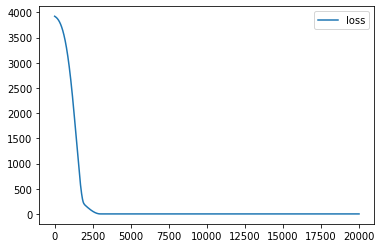

In [20]:
loss_df.plot()

In [21]:
x_test_scaled=scalar.transform(x_test)

In [22]:
ai_brain.evaluate(x_test_scaled,y_test)

1/1 [==============================] - 0s 143ms/step - loss: 0.0047


0.004727221094071865

In [23]:
input=[[105]]

In [24]:
input_scaled=scalar.transform(input)

In [25]:
ai_brain.predict(input_scaled)

array([[114.90803]], dtype=float32)